# Credit Card Spending Habit in India

# Overview

This project contains a comprehensive data analysis focused on understanding and visualizing credit card spending habits in India. The project aims to provide valuable insights into consumer behavior, trends, and patterns related to credit card transactions. For analysis a dataset has been used which contains key aspects of credit card usage, providing valuable insights into spending habits across different dimensions.


# Dataset
Credit card spending habit : Credit Card Spending Habits in India is a dataset containing thousands of samples of the number of credit card transactions in India by city, date, card type,experience type and gender.

* City: Instead of identifying specific cities, this data allows you to uncover spending patterns across different regions of India.
* Date: Determine how credit card usage changes over time, revealing seasonal trends and other patterns.
* Identify how people's spending habits differ depending on the type of credit card they use (rewards cards, travel cards, etc.).
* Exp Type: By combining transactions into categories (groceries, travel, entertainment), this data provides insights into what individuals     prioritize with their spending.
* Gender: Determine if there are any differences in spending habits between men and women who use credit cards.
* Amount: This data includes the amount of each transaction, allowing for detailed financial analysis.


## Import required python libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [9]:
df=pd.read_csv(r"C:\Users\nithi\Downloads\Download _python\Flask-Final\Credit card transactions_India_Simple.csv")

## Checking Dataset

In [10]:
df.head(10)

,id,city,date,card_type,exp_type,gender,amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",08-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",01-Sep-14,Platinum,Bills,F,67932


## Checking data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         26052 non-null  int64 
 1   city       26052 non-null  object
 2   date       26052 non-null  object
 3   card_type  26052 non-null  object
 4   exp_type   26052 non-null  object
 5   gender     26052 non-null  object
 6   amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


#### Found date column is in object type. So converting it in date time type.

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         26052 non-null  int64         
 1   city       26052 non-null  object        
 2   date       26052 non-null  datetime64[ns]
 3   card_type  26052 non-null  object        
 4   exp_type   26052 non-null  object        
 5   gender     26052 non-null  object        
 6   amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


## Checking for missing value in overall data set

<Axes: >

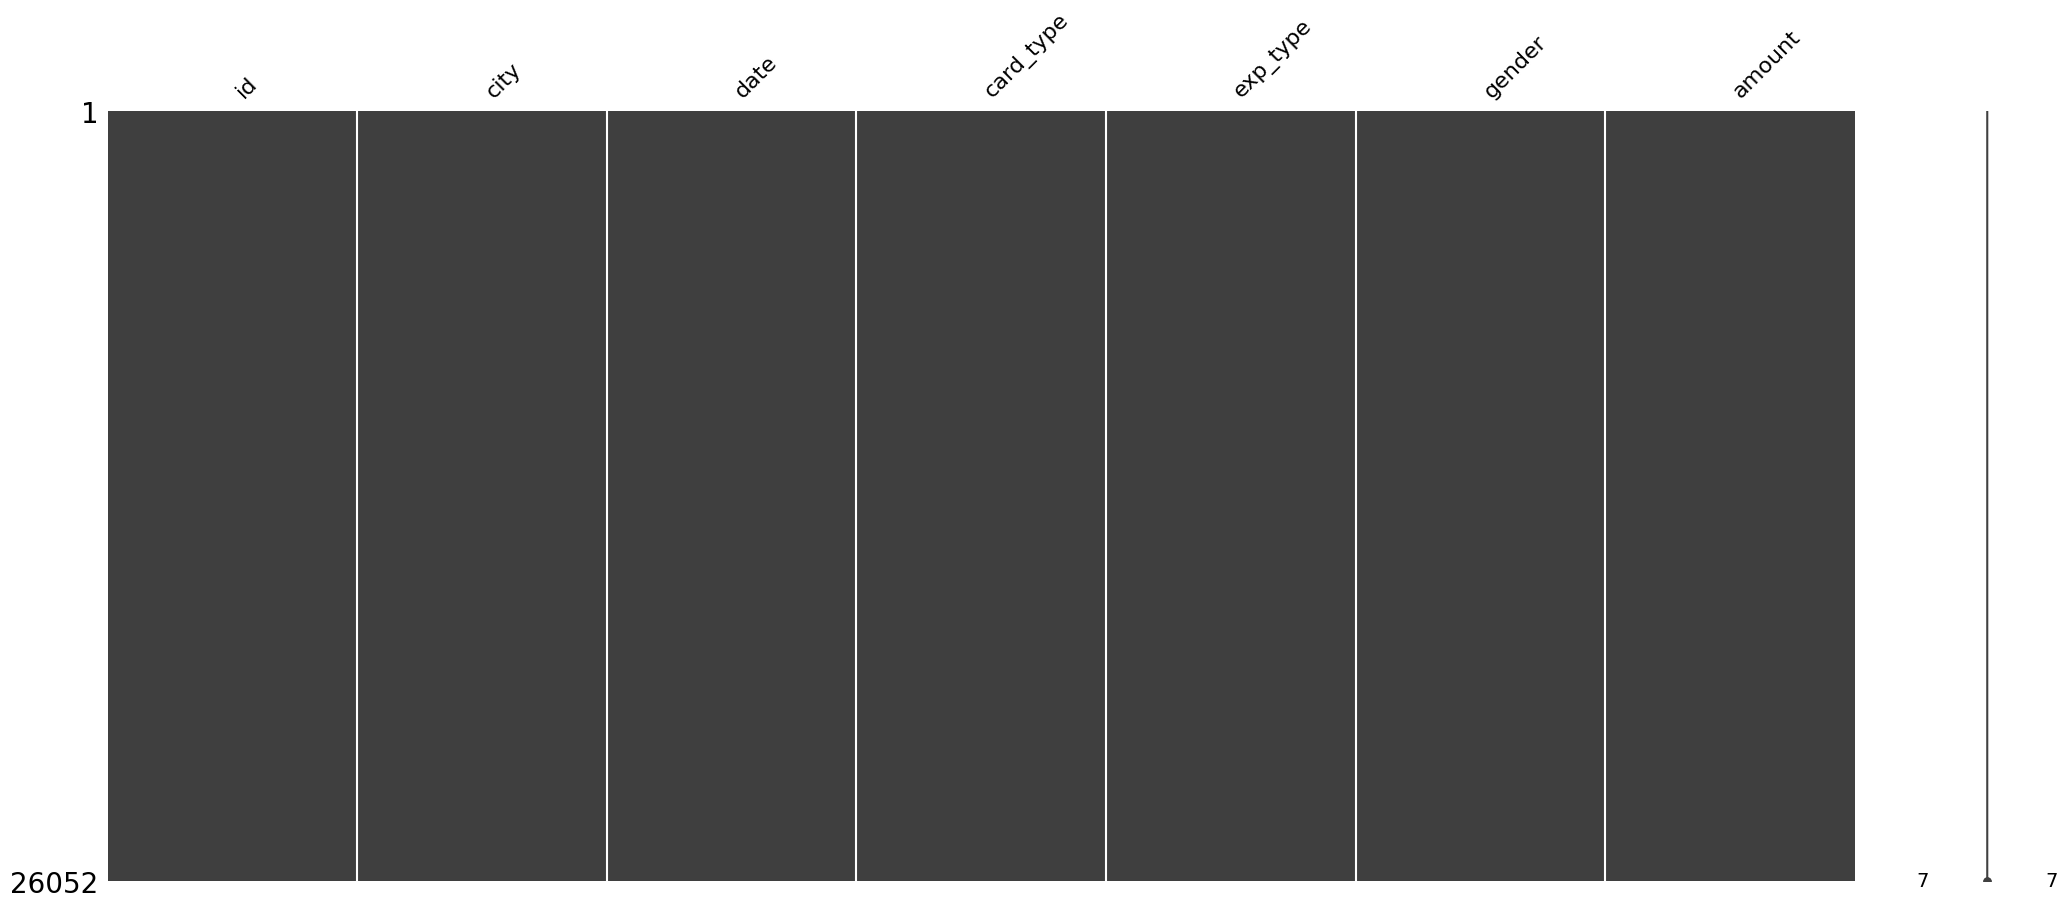

In [15]:
import missingno as msno
import matplotlib
%matplotlib inline
msno.matrix(df)

#### No missing values were identified in the dataset

 ## Descriptive Analysis

### Descriptive statistics for interger columns

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,26052.0,13025.5,0.0,6512.75,13025.5,19538.25,26051.0,7520.708943
date,26052,2014-07-30 11:34:44.385075968,2013-10-04 00:00:00,2014-03-02 00:00:00,2014-08-02 00:00:00,2014-12-28 00:00:00,2015-05-26 00:00:00,NaN
amount,26052.0,156411.537425,1005.0,77120.25,153106.5,228050.0,998077.0,103063.254287


### Descriptive statistics for object columns

In [17]:
df.describe(include="object").T

,count,unique,top,freq
city,26052,986,"Bengaluru, India",3552
card_type,26052,4,Silver,6840
exp_type,26052,6,Food,5463
gender,26052,2,F,13680


### Dropping the column named "index" as it is no use

In [18]:
df.drop("index", axis=1, inplace=True, errors='ignore')
df.head(5)

,id,city,date,card_type,exp_type,gender,amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


### Potting histogram to check distribution of data

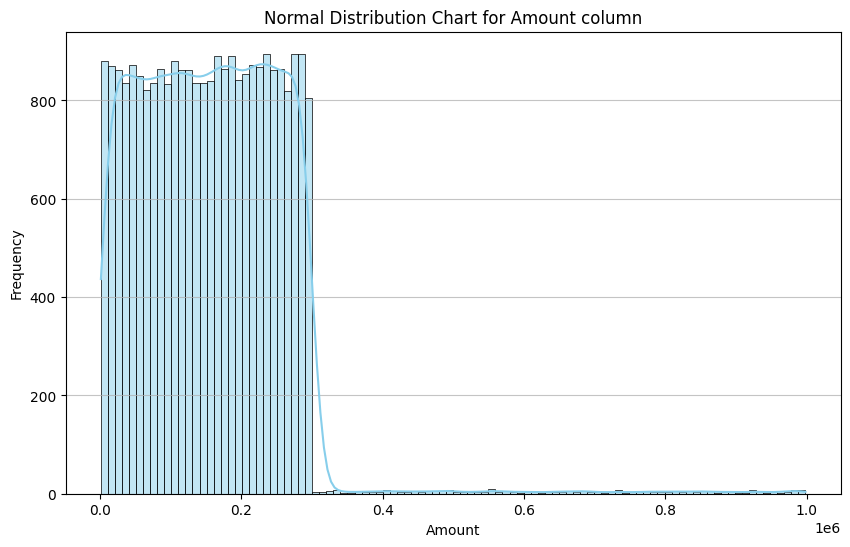

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, color='skyblue', edgecolor='black', bins=100)
plt.title('Normal Distribution Chart for amount column')
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**The data analysis indicates that most values are concentrated towards the lower end, creating a tail towards higher values, indicating a right-skewed distribution. Despite this, the data still displays a balance around the centre, with some higher values on the left side.**

## Data Visualization

### Plotting a pie chart to visualize the distribution of credit card usage in the top 7 cities where the usage is the highest

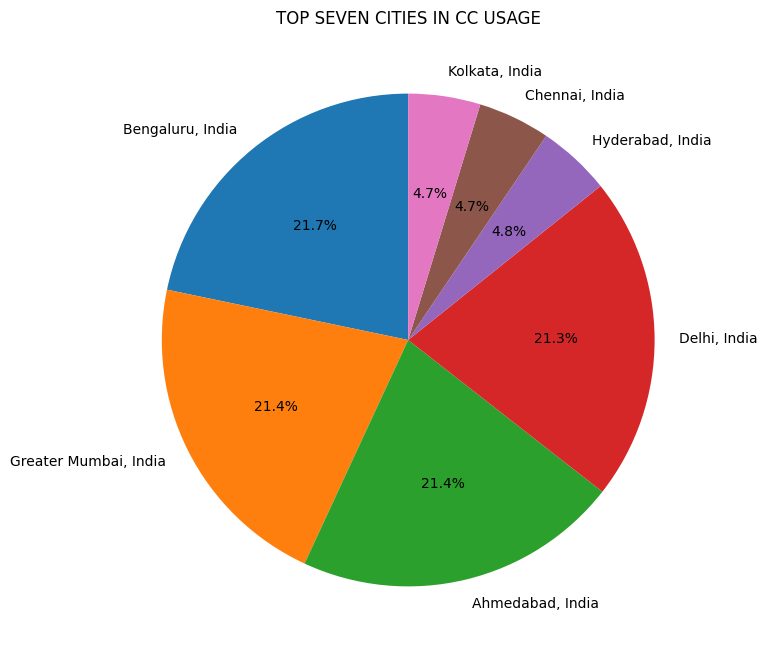

In [24]:
city_counts = df['city'].value_counts().head(7)
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('TOP SEVEN CITIES IN CC USAGE')
plt.show()

**The city with the highest credit card usage is Bengaluru, followed by Mumbai, Ahmedabad and Delhi, in that order.**

### Plotting a bar chart to illustrate the gender distribution in credit card usage

Text(0.5, 1.0, 'spending by Gender')

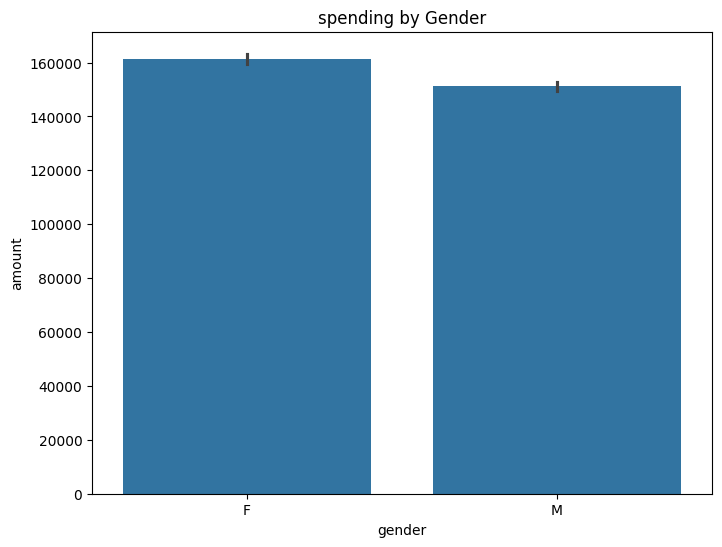

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gender',y='amount').set_title('spending by Gender')

**There is a higher count of female users compared to male users.**

### Plotting a bar chart to depict the distribution of spending based on gender

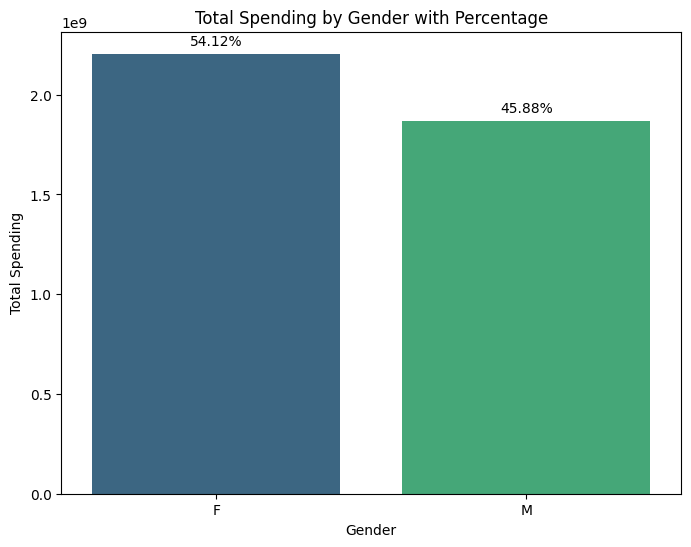

In [27]:
total_spending = df.groupby('gender')['amount'].sum().reset_index()
total_spending['percentage'] = (total_spending['amount'] / total_spending['amount'].sum()) * 100
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='gender', y='amount', data=total_spending, hue='gender', palette='viridis', legend=False)
for p, perc in zip(plot.patches, total_spending['percentage']):
    plot.annotate(f'{perc:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
textcoords='offset points')
plt.title('Total Spending by Gender with Percentage')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

**The aggregate spending by females surpasses that of males, indicating a higher total expenditure among female users.**


### Plotting a pie chart to represent the distribution of the total amount spent based on different card types.


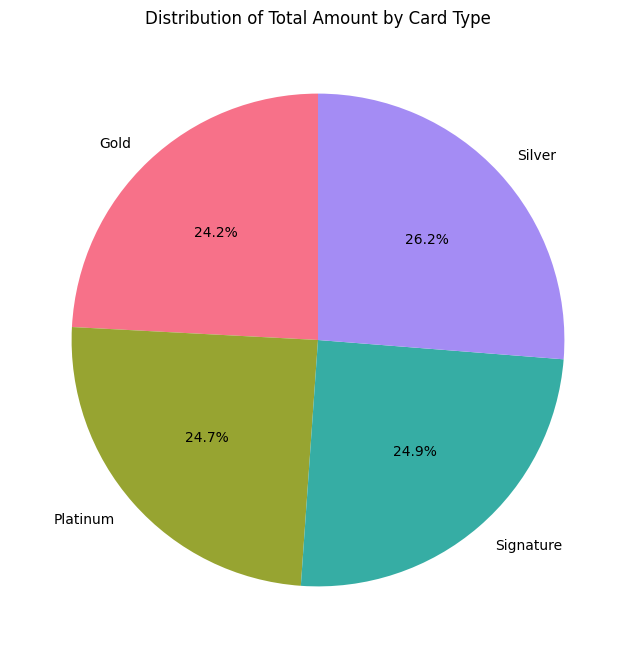

In [29]:
card_type_totals = df.groupby('card_type')['amount'].sum()
plt.figure(figsize=(8, 8))
bright_palette = sns.color_palette("husl", len(card_type_totals))
plt.pie(card_type_totals, labels=card_type_totals.index, autopct='%1.1f%%', startangle=90, colors=bright_palette)
plt.title('Distribution of Total amount by Card Type')
plt.show()

**Although there is no significant disparity in the total amount spent on the various types of credit cards, the silver credit card stands out with the highest total expenditure compared to the other three cards.**

### Plotting a bar chart for amount spent per Expense type

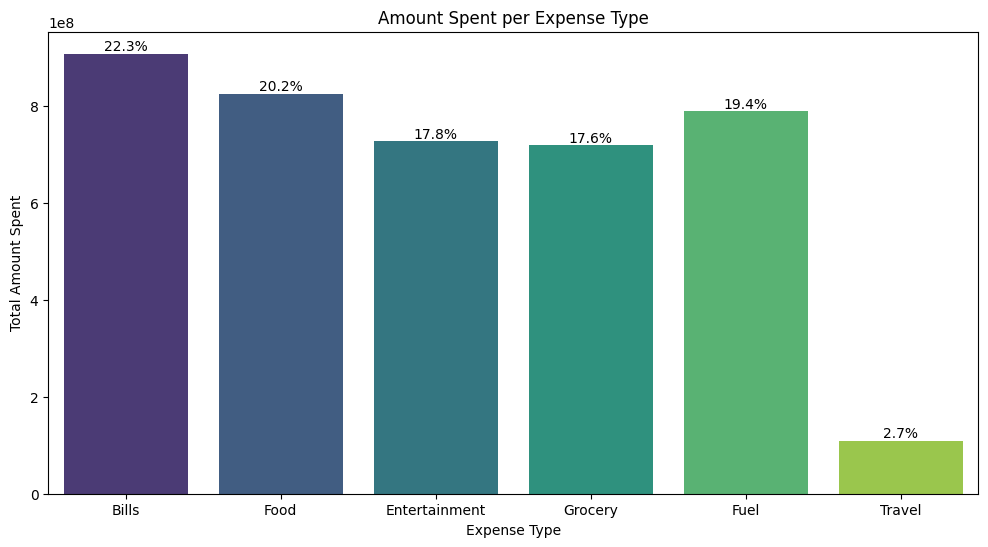

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='exp_type', y='amount', estimator=sum, errorbar=None, hue='exp_type', legend=False, palette='viridis')
total_amount = df['amount'].sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_amount:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.title('amount Spent per Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Total amount Spent')
plt.show()


**According to the data, it is evident that people typically utilize credit cards for bill payments, with food and fuel expenses following closely as the next most common purposes for credit card usage.**

### Plotting a bar chart for total amount spent by card type and gender

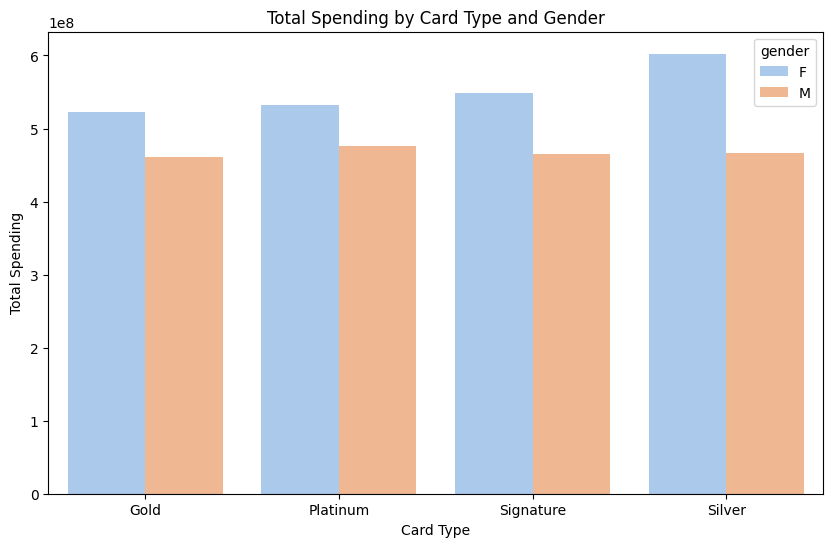

In [35]:
card_gender_totals = df.groupby(['card_type', 'gender'])['amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='card_type', y='amount', hue='gender', data=card_gender_totals, palette='pastel')
plt.title('Total Spending by Card Type and Gender')
plt.xlabel('Card Type')
plt.ylabel('Total Spending')
plt.show()

**The graph clearly indicates that Female users dominate across all types of credit cards.**

### Plotting a bar chart for Total Spending by Type of Expense and Gender

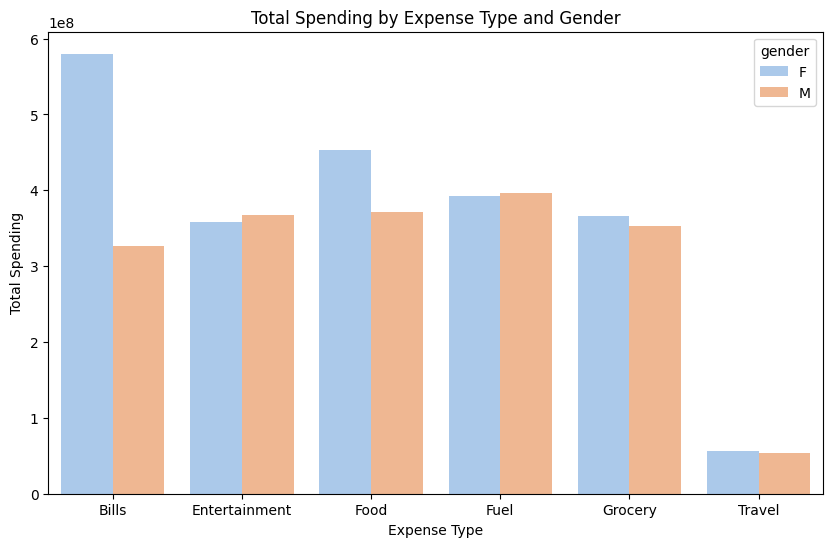

In [38]:
exp_gender_totals = df.groupby(['exp_type', 'gender'])['amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='exp_type', y='amount', hue='gender', data=exp_gender_totals, palette='pastel')
plt.title('Total Spending by Expense Type and Gender')
plt.xlabel('Expense Type')
plt.ylabel('Total Spending')
plt.show()

**The graph shows that females tend to have higher credit card expenses on bills, food, and groceries compared to males. Additionally, male credit card usage surpasses females in categories such as fuel and entertainment. This insight can assist credit card companies in refining their targeting strategies based on specific credit card types to better cater to individual customers.**

### Creating a line graph to visually assess the trend in credit card usage over time

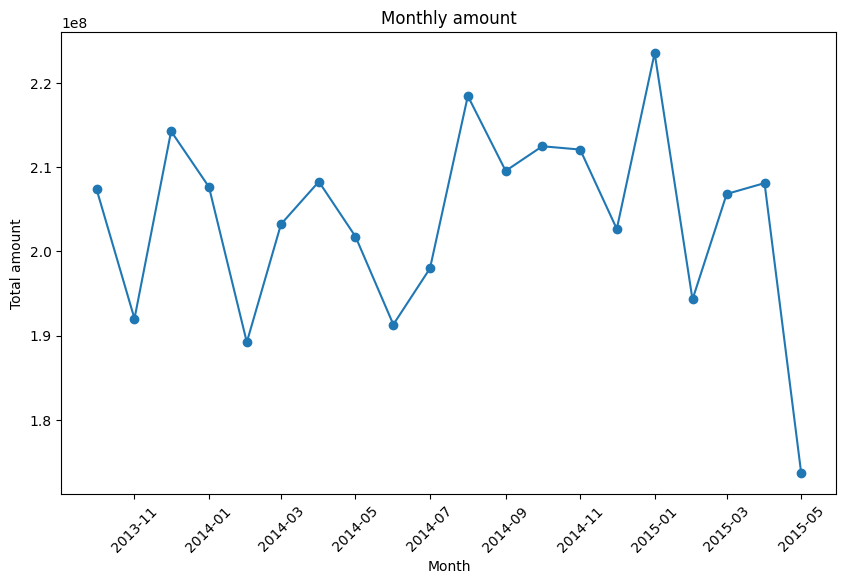

In [41]:
df['Date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.to_period('M')
df['amount'] = pd.to_numeric(df['amount'])
monthly_data = df.groupby('Month')['amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].dt.to_timestamp(), monthly_data['amount'], marker='o', linestyle='-')
plt.title('Monthly amount')
plt.xlabel('Month')
plt.ylabel('Total amount')
plt.xticks(rotation=45)
plt.show()

**The utilization of credit cards experiences a surge during festive seasons in India.**

### Plotting heatmap for Correlation Matrix

In [43]:
# labeling data which are in object type into numerical type of data
label_encoder = LabelEncoder()
categorical_columns = ['city', 'card_type', 'exp_type', 'gender']
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
print(df)

          id  city       date  card_type  exp_type  gender  amount       Date  \
0          0   126 2014-10-29          0         0       0   82475 2014-10-29   
1          1   170 2014-08-22          1         0       0   32555 2014-08-22   
2          2    71 2014-08-27          3         0       0  101738 2014-08-27   
3          3   170 2014-04-12          2         0       0  123424 2014-04-12   
4          4    71 2015-05-05          0         0       0  171574 2015-05-05   
...      ...   ...        ...        ...       ...     ...     ...        ...   
26047  26047   267 2014-06-22          3         5       0  128191 2014-06-22   
26048  26048   584 2014-08-03          2         5       1  246316 2014-08-03   
26049  26049   193 2015-01-16          3         5       1  265019 2015-01-16   
26050  26050   237 2014-09-14          3         5       1   88174 2014-09-14   
26051  26051   193 2013-10-19          2         0       1  184410 2013-10-19   

         Month  
0      201

In [44]:
# Dropping column "Month" to proceed for heat map for correlation 
df.drop("Month", axis=1, inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         26052 non-null  int64         
 1   city       26052 non-null  int32         
 2   date       26052 non-null  datetime64[ns]
 3   card_type  26052 non-null  int32         
 4   exp_type   26052 non-null  int32         
 5   gender     26052 non-null  int32         
 6   amount     26052 non-null  int64         
 7   Date       26052 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(4), int64(2)
memory usage: 1.2 MB


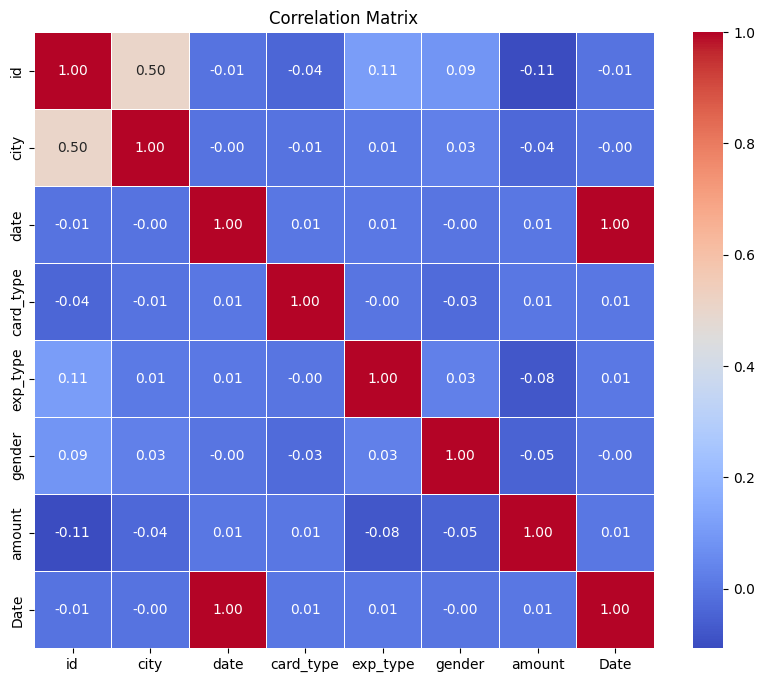

In [45]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**There is no significant correlation observed between the variables.**

# Conclusion

In conclusion, the findings from this report provide valuable insights for credit card firms to refine their targeting strategies based on user demographics, preferences, and seasonal trends. Understanding these patterns can help in tailoring services to meet the diverse needs of different consumer segments in the dynamic landscape of credit card usage in India.

# Limitations

#### Following are limitations of this analysis:


The data spans the years 2013, 2014, and 2015, which means that the findings may not accurately reflect the current credit card usage patterns. Economic conditions, consumer behaviours, and spending trends can evolve over time. Therefore, relying solely on historical data may not provide a current and relevant understanding of credit card usage dynamics.
* The dataset lacks critical variables, such as income levels, spending limits, and occupational information, which are integral in understanding the intricacies of spending habits. Without considering these socioeconomic factors, the analysis may fail to provide a comprehensive view of the factors influencing credit card usage. The absence of income data, for example, makes it difficult to assess the affordability of transactions and the impact of financial well-being on spending patterns. As a result, the dataset's limitations extend to its inability to capture the broader context of personalities' financial situations, which can significantly influence their credit card activities.
* The dataset's analysis is constrained by its focus on a specific set of credit card types, hypothetically excluding other credit card variants available in the market. The absence of data on these excepted card types limits the extensiveness of the analysis, as different cards may come with distinct features, benefits, and user behaviours.
* Economic circumstances and external factors that influence spending behaviour, such as inflation, interest rates, or major economic events, may not be adequately considered in the dataset. Failing to account for these external variables could limit the ability to draw accurate conclusions.


### THANK YOU
#### Appreciation and suggestions are welcomed!!